let’s get started with the task of electric vehicles market size analysis by importing the necessary Python libraries and the [dataset](https://statso.io/market-size-of-evs-case-study/):

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('D:/newai/Data Analysis Project/Electric Vehicles Market Size Analysis/Electric_Vehicle_Population_Data.csv')

In [4]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [5]:
data.shape

(177866, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [7]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [8]:
data = data.dropna()

### For the task of market size of electric vehicles analysis, we can explore the following areas:

* EV Adoption Over Time: Analyze the growth of the EV population by model year.
* Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
* EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
* Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
* Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
* Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.

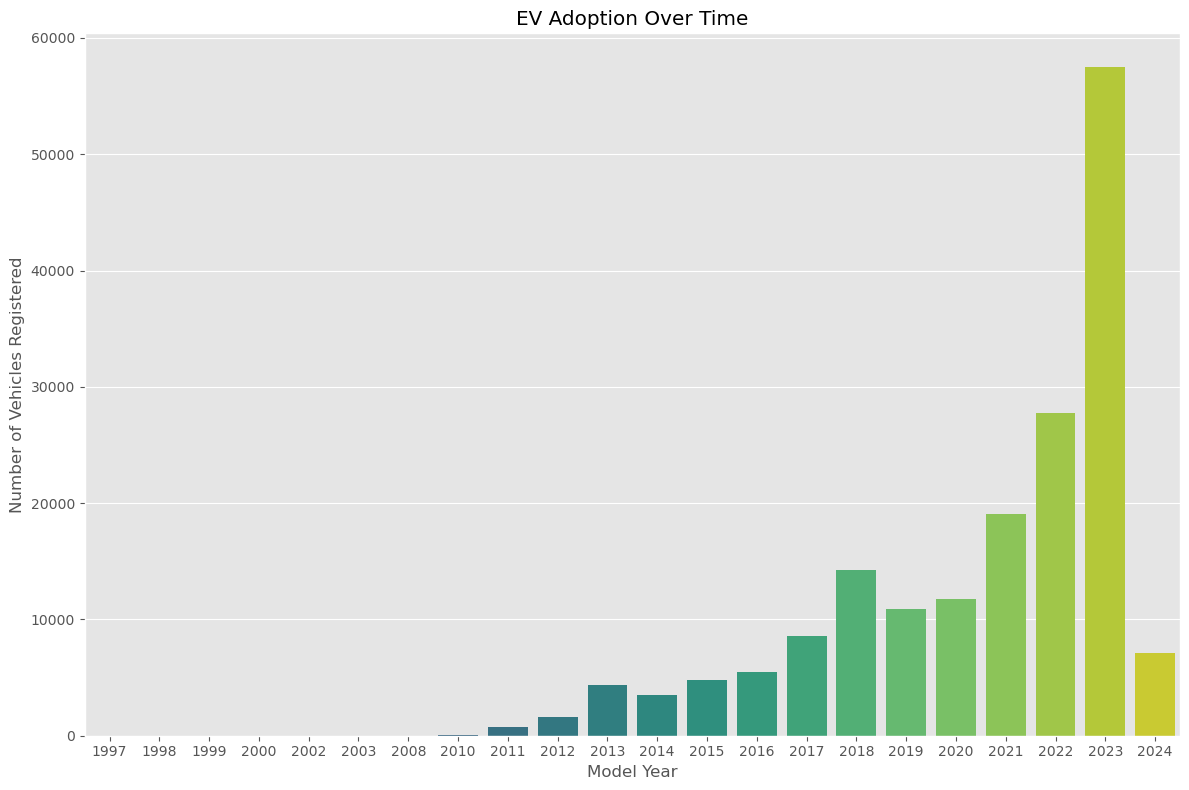

In [9]:
# EV Adoption Over Time
# sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
ev_adoption_by_year = data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette='viridis')
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.tight_layout()

****

##### Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:



In [10]:
# geographical distribution at county level
ev_country_distribution = data['County'].value_counts()
top_counties = ev_country_distribution.head(3).index

In [11]:
# filtering the dataset for these top counties
top_counties_data = data[data['County'].isin(top_counties)]

In [12]:
# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data\
                                   .groupby(['County', 'City'])\
                                   .size().sort_values(ascending=False)\
                                   .reset_index(name='Number of Vehicles')

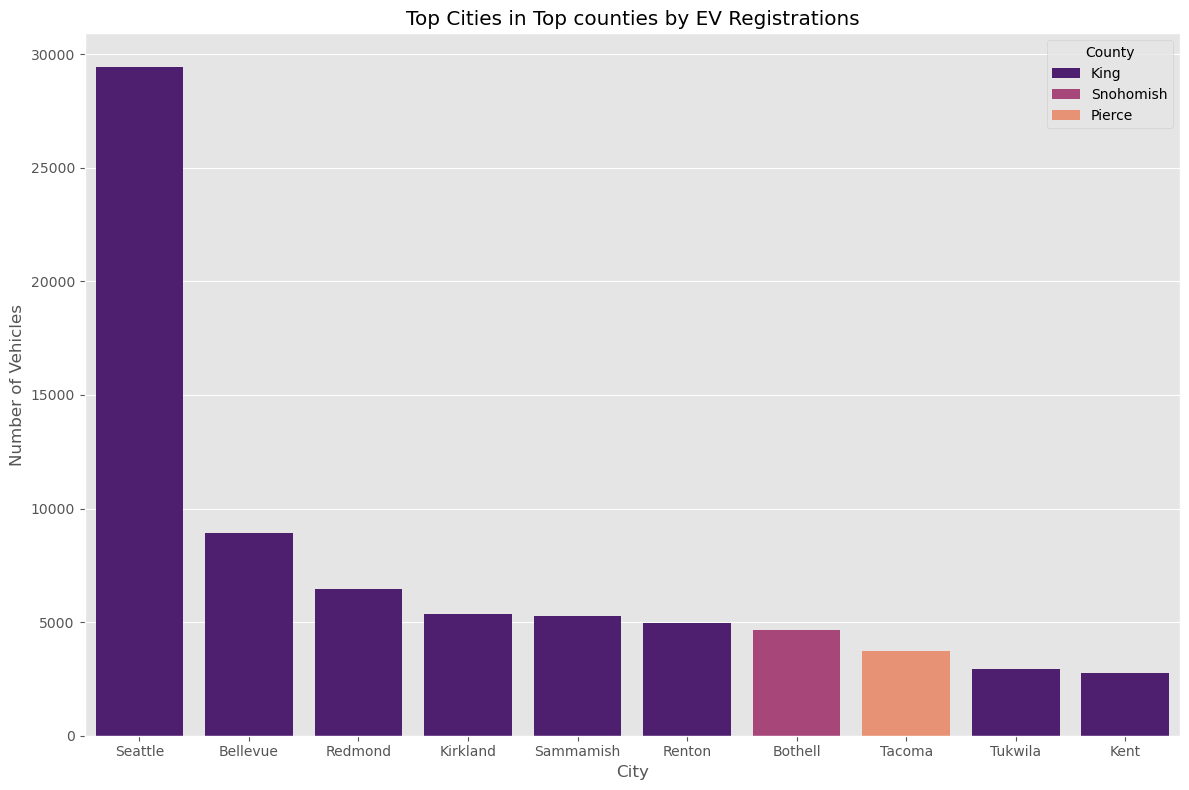

In [13]:
# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_cities, x='City', y='Number of Vehicles', hue='County', palette='magma', dodge=False)
plt.title('Top Cities in Top counties by EV Registrations')
plt.xlabel('City')
plt.ylabel('Number of Vehicles')
plt.legend(title='County')
plt.tight_layout()

Seattle, which is in King County, has the highest number of EV registrations by a significant margin, far outpacing the other cities listed.
Bellevue and Redmond, also in King County, follow Seattle with the next highest registrations, though these are considerably less than Seattle’s.
Cities in Snohomish County, such as Kirkland and Sammamish, show moderate EV registrations.
Tacoma and Tukwila, representing Pierce County, have the fewest EV registrations among the cities listed, with Tacoma slightly ahead of Tukwila.
The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties.
Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.
************

Next, let’s explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), can provide insights into consumer preferences and the adoption patterns of purely electric vs. hybrid electric solutions. So, let’s visualize the distribution of electric vehicle types to see which categories are most popular among the registered vehicles:

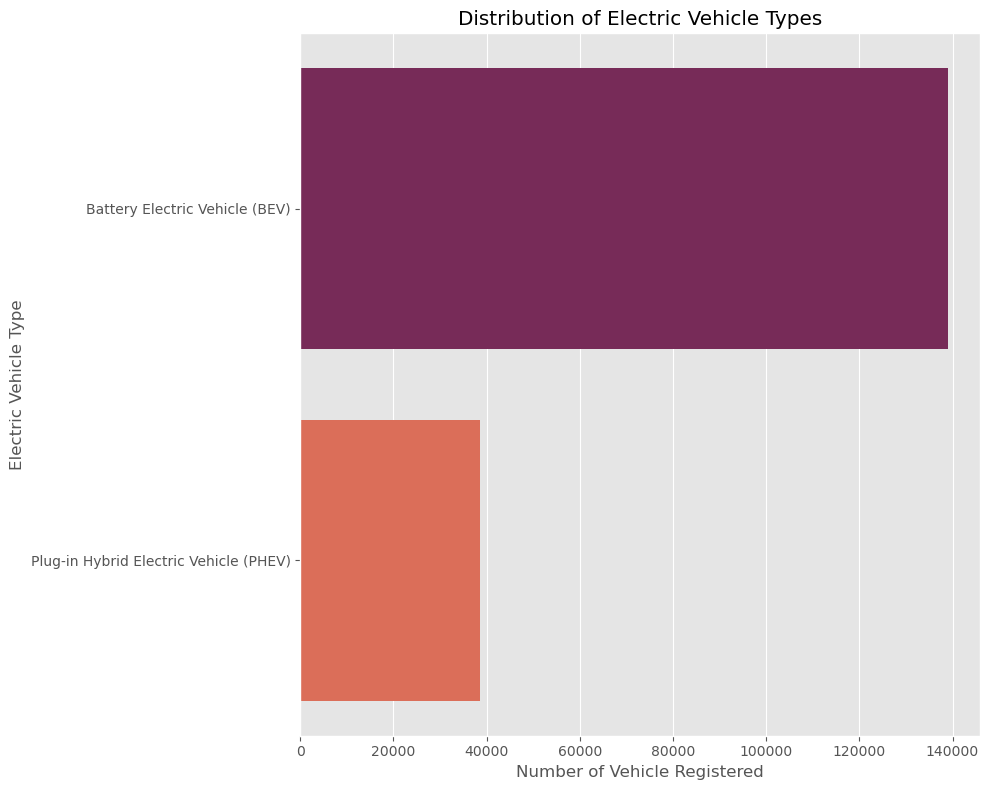

In [14]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette='rocket')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicle Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.
****

Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. This analysis will help us identify which manufacturers and specific models dominate the EV market.


So, let’s have a look at the most popular manufacturers and then drill down into the most popular models within those manufacturers:



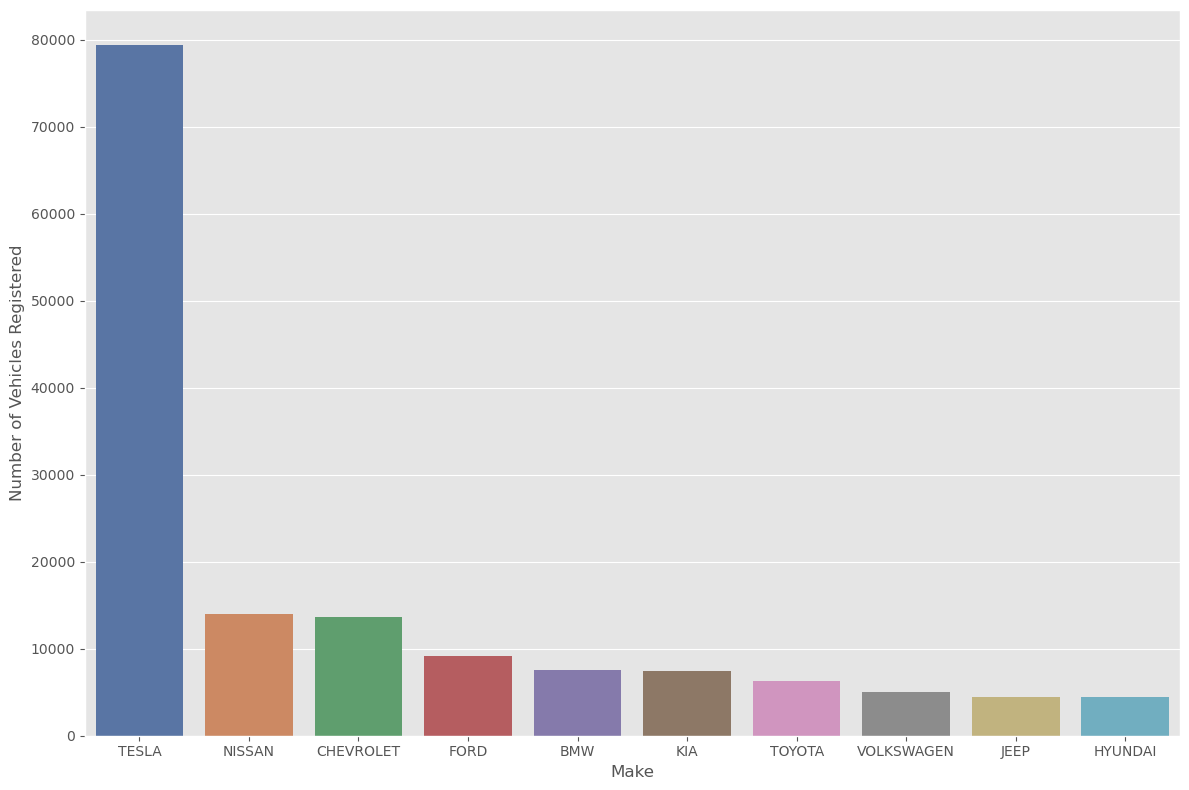

In [15]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = data['Make'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=ev_make_distribution.index, y=ev_make_distribution.values, palette='deep')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles Registered')
plt.tight_layout()

The above chart shows that:

TESLA leads by a substantial margin with the highest number of vehicles registered.
NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.
*****

Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:

In [16]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

In [17]:
# filtering the dataset for these top manufacturers
top_makes_data = data[data['Make'].isin(top_3_makes)]

In [18]:
# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data\
                                  .groupby(['Make', 'Model'])\
                                  .size().sort_values(ascending=False)\
                                  .reset_index(name='Number of Vehicles')

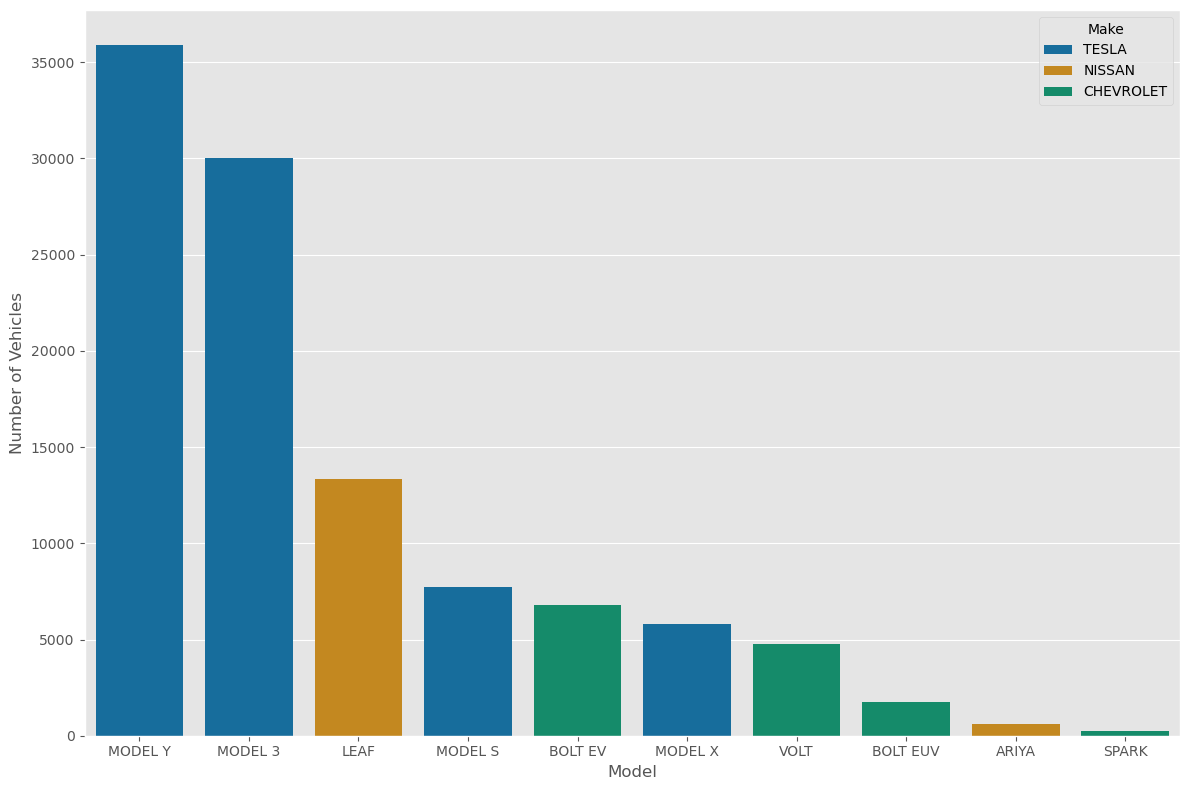

In [19]:
# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_models, x='Model', y='Number of Vehicles', hue='Make', palette='colorblind', dodge=False)
plt.xlabel('Model')
plt.ylabel('Number of Vehicles')
plt.legend(title='Make')
plt.tight_layout()

TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.
TESLA’s MODEL S and MODEL X also have a significant number of registrations.
CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.
******

Next, we’ll explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles. The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years.

c:\Users\Mohamed Makki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


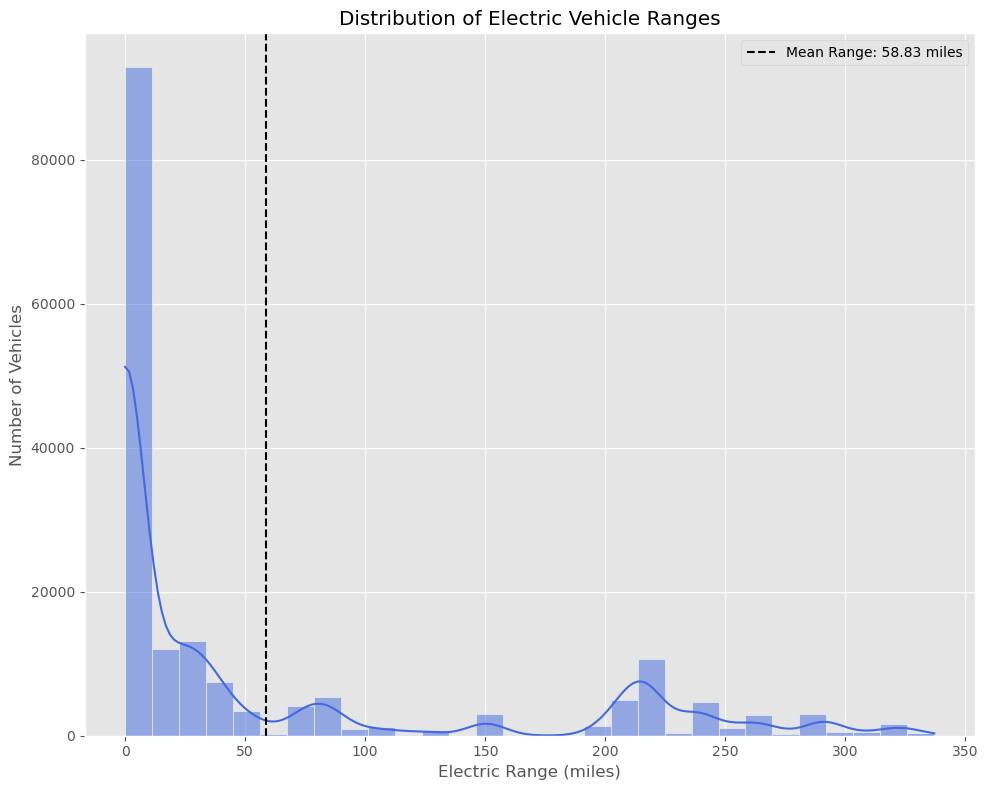

In [20]:
# analyzing the distribution of electric range
plt.figure(figsize=(10, 8))
sns.histplot(data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(data['Electric Range'].mean(),\
             color='black', linestyle='--',
             label=f'Mean Range: {data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.tight_layout()

##### The above graph shows the mean electric range. Key observations from the graph include:

* There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.
* The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.
* The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.
* Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.
****

Now, let’s delve into the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time. A positive trend in this analysis would indicate continuous improvements, offering consumers EVs with longer driving ranges and potentially addressing one of the major concerns regarding the EV market (range anxiety):

c:\Users\Mohamed Makki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mohamed Makki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


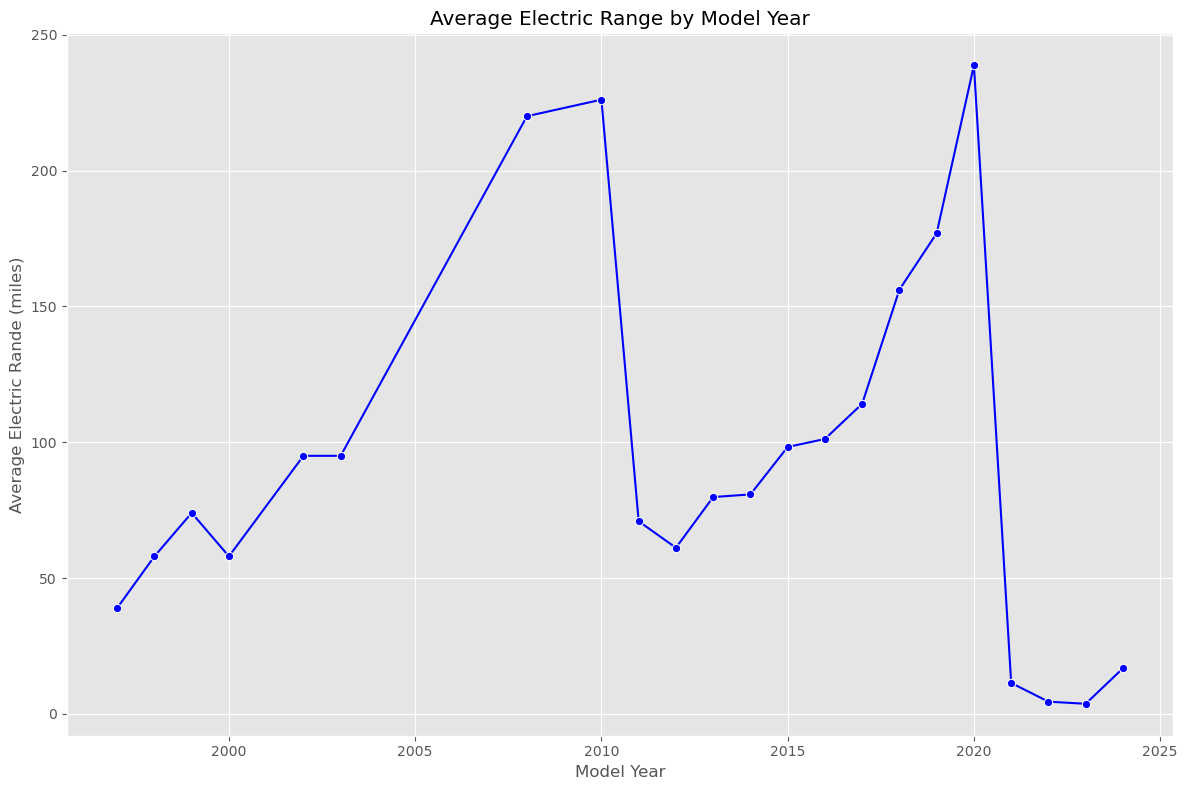

In [21]:
# calculating the average electric range by model year
average_range_by_year = data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='blue')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Rande (miles)')
plt.tight_layout()

* There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
* There is a noticeable peak around the year 2020 when the average range reaches its highest point.
* Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
* After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.
****

Next, let’s explore how electric ranges vary among the top manufacturers and models. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities

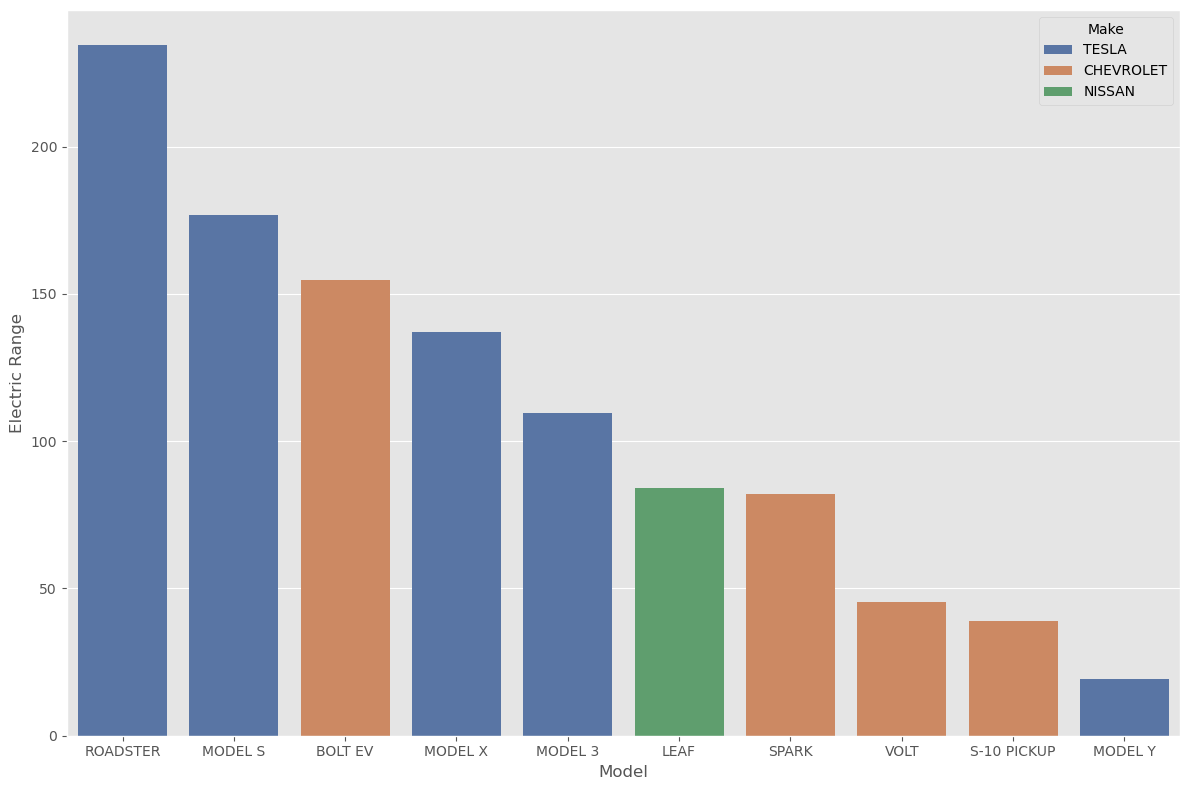

In [43]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_range_models, x='Model', y='Electric Range', hue='Make', palette='deep', dodge=False)
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Model')
plt.ylabel('Average Electric Range (miles)')
plt.tight_layout()

The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.
****

Now, let’s move forward towards finding the estimated market size of electric vehicles in the United States. I’ll first count the number of EVs registered every year:

In [48]:
# calculate the number of EVs registered each year
registration_counts = data['Model Year'].value_counts().sort_index()
registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:

* In 2021, there were 19,063 EVs registered.
* In 2022, the number increased to 27708 EVs.
* In 2023, a significant jump to 57,519 EVs was observed.
* For 2024, currently, 7,072 EVs are registered, which suggests partial data.

***
***

### Summary
So, market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities.